In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [15]:
def min_max_normalization(x):
    x_max = x.max()
    x_min = x.min()
    x_range = x_max-x_min
    return pd.Series([(i-x_min)/x_range for i in x])

In [16]:
df = pd.read_csv('dataset.csv')

# Cleaning

In [17]:
df

,I_Id,I_W,I_Fat_C,I_Vis,I_MRP_JD,I_category,I_MRP_US,O_Id,O_Establ_Y,O_Size,I_Recalled,O_Loc_T,O_T,I_O_Sales
0,FDA15,9.300,Low Fat,0.016172,225.644532,Dairy,317.8092,OUT049,2009,Medium,NO,Tier 1,Carrefour,3915.1380
1,DRC01,5.920,Regular,0.019403,82.551132,Soft Drinks,116.2692,OUT018,2019,Medium,YES,Tier 3,C-Town,623.4228
2,FDN15,17.500,Low Fat,0.016885,148.828780,Meat,209.6180,OUT049,2009,Medium,NO,Tier 1,Carrefour,2277.2700
3,FDX07,19.200,Regular,0.000000,177.567450,Fruits and Vegetables,250.0950,OUT010,2008,NaN,NO,Tier 3,Family Basket,912.3800
4,NCD19,8.930,Low Fat,0.000000,86.521594,Household,121.8614,OUT013,1997,High,NO,Tier 3,Carrefour,1174.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056908,200.590478,Snack Foods,282.5218,OUT013,1997,High,NO,Tier 3,Carrefour,2958.3834
8519,FDS36,8.380,Regular,0.047107,125.071470,Baking Goods,176.1570,OUT045,2012,NaN,NO,Tier 2,Carrefour,729.2850
8520,NCJ29,10.600,Low Fat,0.035311,108.716904,Health and Hygiene,153.1224,OUT035,2014,Small,NO,Tier 2,Carrefour,1373.1136
8521,FDN46,7.210,Regular,0.145346,121.504572,Snack Foods,171.1332,OUT018,2019,Medium,NO,Tier 3,C-Town,2025.5976


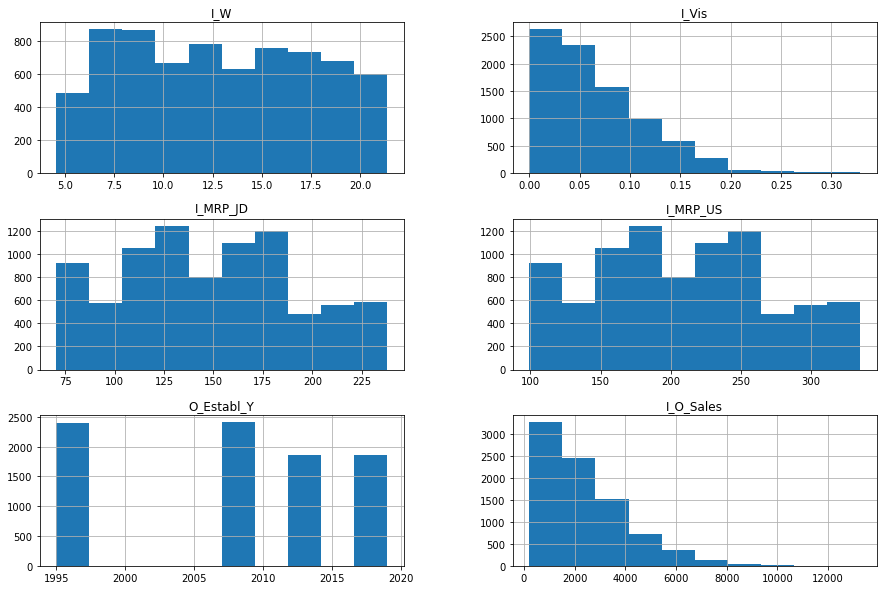

In [18]:
df.hist(figsize=(15, 10));

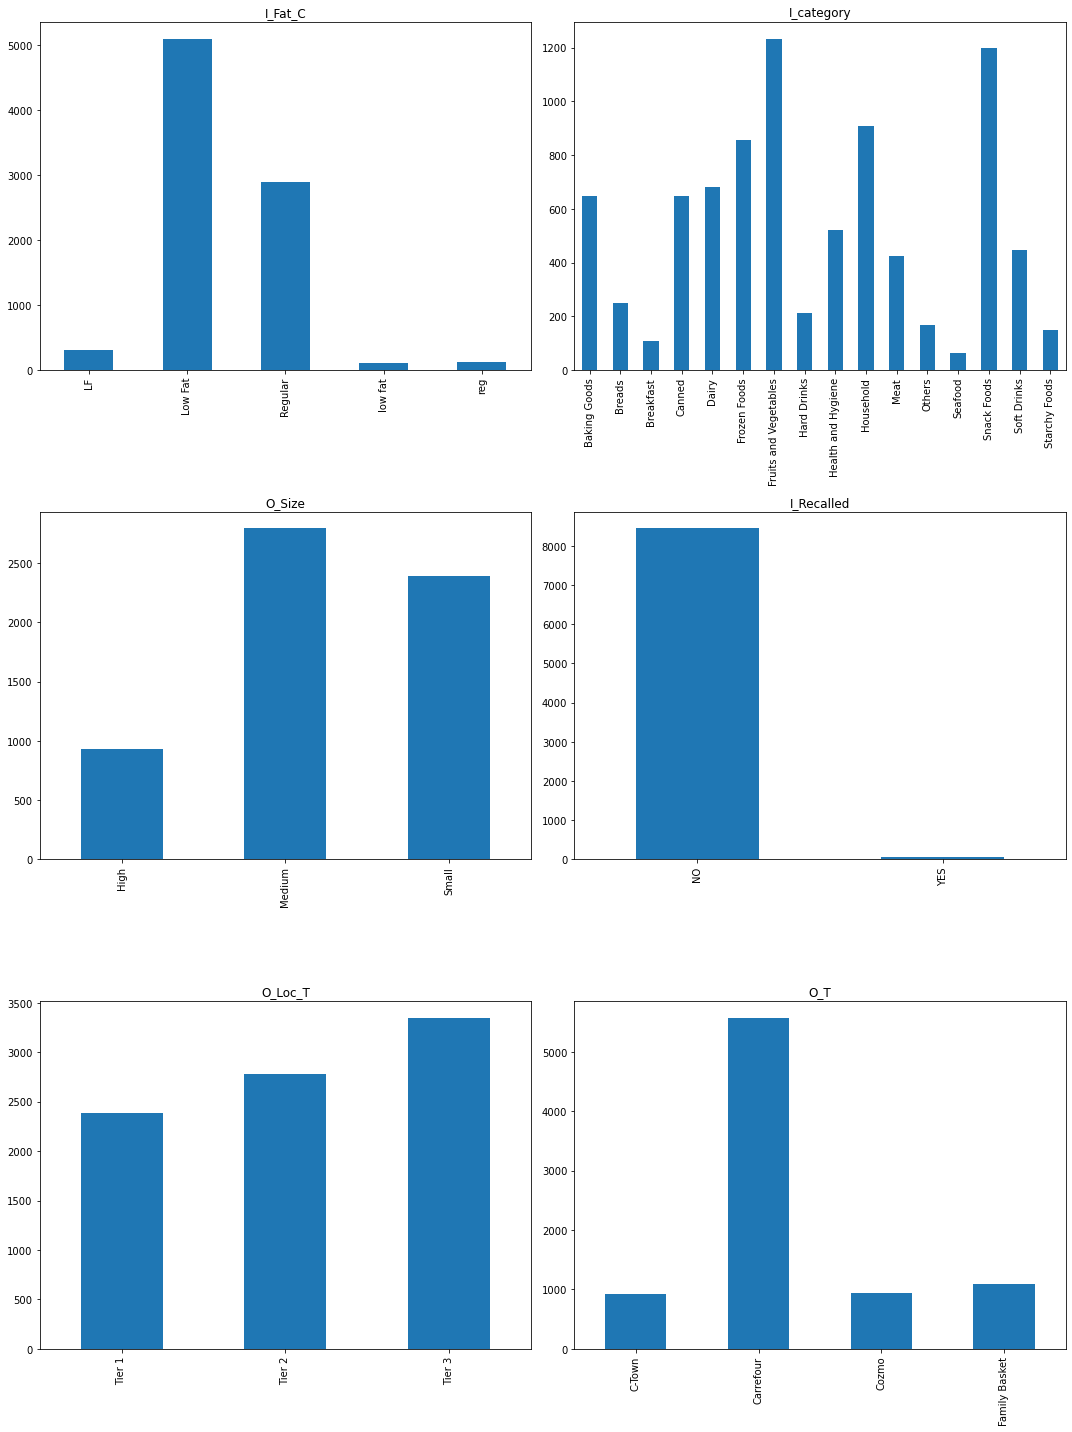

In [19]:
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
axes = axes.flatten()


for i, column in enumerate(df[['I_Fat_C','I_category','O_Size', 'I_Recalled','O_Loc_T','O_T']].columns):
    df[['I_Fat_C','I_category','O_Size', 'I_Recalled','O_Loc_T','O_T']][column].value_counts().sort_index().plot(kind='bar', ax=axes[i])
    axes[i].set_title(column)
    
plt.tight_layout()
plt.show()

In [20]:
df.isna().sum()

I_Id             0
I_W           1463
I_Fat_C          0
I_Vis            0
I_MRP_JD         0
I_category       0
I_MRP_US         0
O_Id             0
O_Establ_Y       0
O_Size        2410
I_Recalled       0
O_Loc_T          0
O_T              0
I_O_Sales        0
dtype: int64

In [21]:
df.I_W.fillna(df.I_W.mean(),inplace=True)

In [22]:
df.isna().sum()

I_Id             0
I_W              0
I_Fat_C          0
I_Vis            0
I_MRP_JD         0
I_category       0
I_MRP_US         0
O_Id             0
O_Establ_Y       0
O_Size        2410
I_Recalled       0
O_Loc_T          0
O_T              0
I_O_Sales        0
dtype: int64

In [23]:
df.O_Size.fillna(df.O_Size.value_counts().sort_values(ascending=False).index[0], inplace=True)

In [24]:
df.isna().sum()

I_Id          0
I_W           0
I_Fat_C       0
I_Vis         0
I_MRP_JD      0
I_category    0
I_MRP_US      0
O_Id          0
O_Establ_Y    0
O_Size        0
I_Recalled    0
O_Loc_T       0
O_T           0
I_O_Sales     0
dtype: int64

In [25]:
df.I_Fat_C.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [26]:
# fixing values with same meaning
df.I_Fat_C.mask(df.I_Fat_C == 'LF', 'Low Fat', inplace=True)
df.I_Fat_C.mask(df.I_Fat_C == 'reg', 'Regular', inplace=True)
df.I_Fat_C.mask(df.I_Fat_C == 'low fat', 'Low Fat', inplace=True)

In [27]:
df.I_Fat_C.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [28]:
df.drop(columns=['I_Id','O_Id','I_MRP_US'], inplace=True)

In [29]:
df

,I_W,I_Fat_C,I_Vis,I_MRP_JD,I_category,O_Establ_Y,O_Size,I_Recalled,O_Loc_T,O_T,I_O_Sales
0,9.300,Low Fat,0.016172,225.644532,Dairy,2009,Medium,NO,Tier 1,Carrefour,3915.1380
1,5.920,Regular,0.019403,82.551132,Soft Drinks,2019,Medium,YES,Tier 3,C-Town,623.4228
2,17.500,Low Fat,0.016885,148.828780,Meat,2009,Medium,NO,Tier 1,Carrefour,2277.2700
3,19.200,Regular,0.000000,177.567450,Fruits and Vegetables,2008,Medium,NO,Tier 3,Family Basket,912.3800
4,8.930,Low Fat,0.000000,86.521594,Household,1997,High,NO,Tier 3,Carrefour,1174.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056908,200.590478,Snack Foods,1997,High,NO,Tier 3,Carrefour,2958.3834
8519,8.380,Regular,0.047107,125.071470,Baking Goods,2012,Medium,NO,Tier 2,Carrefour,729.2850
8520,10.600,Low Fat,0.035311,108.716904,Health and Hygiene,2014,Small,NO,Tier 2,Carrefour,1373.1136
8521,7.210,Regular,0.145346,121.504572,Snack Foods,2019,Medium,NO,Tier 3,C-Town,2025.5976


# KNN

In [204]:
df.O_T.value_counts()

Carrefour        5577
Family Basket    1083
Cozmo             935
C-Town            928
Name: O_T, dtype: int64

In [205]:
df_KNN = df.drop(['I_W', 'I_Fat_C','I_Vis','I_MRP_JD','I_category','I_Recalled'], axis=1)

In [206]:
temp = pd.get_dummies(df_KNN.loc[:, ['O_Size','O_Loc_T']])
df_KNN.drop(['O_Size','O_Loc_T'], axis=1, inplace=True)
df_KNN = pd.concat([df_KNN, temp], axis=1)

min max

In [207]:
df_KNN_min_max = df_KNN.copy()
df_KNN_min_max.loc[:,['O_Establ_Y','I_O_Sales']] = df_KNN_min_max.loc[:,['O_Establ_Y','I_O_Sales']].apply(min_max_normalization)


In [208]:
Y_min_max=df_KNN_min_max.loc[:,'O_T']
X_min_max=df_KNN_min_max.drop(['O_T'], axis=1)
x_train_min_max, x_test_min_max, y_train_min_max, y_test_min_max = train_test_split(X_min_max,Y_min_max,test_size=0.3, random_state=0)
x_train_min_max=x_train_min_max.to_numpy()
x_test_min_max=x_test_min_max.to_numpy()
y_train_min_max=y_train_min_max.to_numpy()

zscore

In [209]:
df_KNN_zscore = df_KNN.copy()
df_KNN_zscore.loc[:,['O_Establ_Y','I_O_Sales']] = df_KNN_zscore.loc[:,['O_Establ_Y','I_O_Sales']].apply(zscore)

In [210]:
Y_zscore= df_KNN_zscore.loc[:,'O_T']
X_zscore=df_KNN_zscore.drop(['O_T'], axis=1)
x_train_zscore, x_test_zscore, y_train_zscore, y_test_zscore = train_test_split(X_zscore,Y_zscore,test_size=0.3, random_state=0)
x_train_zscore=x_train_zscore.to_numpy()
x_test_zscore=x_test_zscore.to_numpy()
y_train_zscore=y_train_zscore.to_numpy()

no normalisation

In [211]:
Y=df_KNN.loc[:,'O_T']
X=df_KNN.drop(['O_T'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=0)
x_train=x_train.to_numpy()
x_test=x_test.to_numpy()
y_train=y_train.to_numpy()

In [225]:
import statistics as st
class KNN:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
    
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train
        
    def pred(self, x_test):
        distances_for_all_points = [np.linalg.norm(self.x_train - i, axis=1) for i in x_test]
        
        predictions = []
        for distances in distances_for_all_points:
            nearest_neighbor_rings = self.y_train[distances.argsort()[:self.n_neighbors]]
            print(np.array(distances.argsort()[:self.n_neighbors]))
            
            unique, counts = np.unique(nearest_neighbor_rings, return_counts=True)
            predictions.append(st.mode(nearest_neighbor_rings))
            
        return predictions


In [ ]:
KNN_model_1 = KNN(3)
KNN_model_1.fit(x_train_min_max, y_train_min_max)
y_pred_1= KNN_model_1.pred(x_test_min_max)

KNN_model_2 = KNN(7)
KNN_model_2.fit(x_train_min_max, y_train_min_max)
y_pred_2= KNN_model_2.pred(x_test_min_max)

KNN_model_3 = KNN(11)
KNN_model_3.fit(x_train_min_max, y_train_min_max)
y_pred_3 = KNN_model_3.pred(x_test_min_max)


[3049 3423 4033]
[4807 4268   12]
[ 709 5781 4190]
[2386 1727 3041]
[1830 4977 5669]
[4356  622   20]
[ 233  796 1023]
[4965  455  153]
[3856 1491  797]
[4841 4532 3973]
[ 394 1851 1247]
[2204 3113 3771]
[4655  625 3610]
[3625 3766 5266]
[1278 3219 2929]
[2395 2495 2257]
[5773 4607 1064]
[5763 1338  257]
[2591 3097 5359]
[ 613 4783  558]
[3287  177 4296]
[ 857 2226 3712]
[1141  483 3838]
[1053 1776 3651]
[2817 4021 5685]
[4115 4184 2103]
[2886 1652 4086]
[4034 4305 4740]
[5299 2638 2376]
[1668 3781 2506]
[2346 3168 1589]
[ 240 4110 1203]
[2134 3736 2861]
[2257 5077 2495]
[4990 5007 5523]
[5624 4451  872]
[1106 4935 5536]
[5581 4578 2886]
[4090  885 2413]
[2446 3801 4584]
[3599 4864 5376]
[5398 4650  148]
[5532 3022 2748]
[3723  465 1979]
[4491 5387 4245]
[ 987 3207 4374]
[ 631 5598 3153]
[3264 2702 4348]
[2200 4951 4845]
[2174 5071 5127]
[4250 3425 5160]
[5047 2218 2617]
[2173 3057  731]
[1137  948 2386]
[4246 2573 5873]
[3576 1607 4465]
[3855 4776 5733]
[3978 1684 2955]
[2712 2834 515

[  18 3693 2090]
[5179 5767  724]
[5273 4805 4917]
[3244 3149 4252]
[1946  490 5818]
[1915 5244 3445]
[2253 3081 1375]
[5375  602  575]
[2316 1567 4978]
[1980 2586 2534]
[3387 2955 5224]
[  48 1310 5799]
[3724 5075 2556]
[5419   83 4902]
[1403 1949 2665]
[5036 5849 3118]
[ 398 5162 4708]
[5226 2016 5764]
[1831 1397 4826]
[3986 2018 3030]
[ 165 5148 5463]
[2000  839 2575]
[1599 1627 3659]
[ 724 5179 5767]
[3306 1991 2438]
[5030 4141  300]
[ 554 4492  955]
[3903 4787  817]
[2976 1936 5427]
[2794 1184 3744]
[ 755 3270 4050]
[ 895 5590  859]
[4641 4779 2207]
[4403   97 4226]
[4436 2935  292]
[2758 2384 2526]
[1506 5105   14]
[2363 4060 5284]
[4460   62 5884]
[3091 3310 3733]
[ 523 5608  443]
[ 749 5688 3533]
[4239 3402  399]
[4468 5736 1399]
[2320 2210 1206]
[5081 3092 4299]
[  48 1310 5799]
[4894 1249 2716]
[ 843 5227 1478]
[2437 2516 1215]
[ 169 3160 1192]
[ 433 4214 1147]
[4120 1484 5579]
[1055 2983 3663]
[ 553 3638 5566]
[5631 5294 5326]
[3264 4348 2702]
[5572 4107 2868]
[5358 2303 472

[2370 1318 4169]
[3343 5666 2079]
[3573 2770  758]
[5508  965 2052]
[ 971 2722 1003]
[2451 2374  412]
[3974 3700 1887]
[1273 5277 4312]
[5358 2303  932]
[ 512 4266 3055]
[1573 1882 2706]
[2640 3834 2318]
[2633 1263 3082]
[4075 3415 4298]
[ 717 5828 4010]
[5603 4486 3866]
[4243 4137 2342]
[ 899 3039 1857]
[5801 4548 4828]
[4564 4793 2677]
[2385 4751 2695]
[ 483 4029 5839]
[2093 5878 5609]
[4227 2040 3919]
[1864 2715 2532]
[3649 5379 3904]
[4923 3233  160]
[4455 2297 1910]
[3652 1753 5005]
[3627   57 3512]
[3685  749 2664]
[1861 1606 3367]
[4069  615 3105]
[ 547 5881 4320]
[ 105 4113 1200]
[1949 2665 1403]
[5042 5835 4933]
[ 878 2132 1926]
[ 122 2563 5038]
[5813 5248 3820]
[5746 3759  123]
[2279 3843 1581]
[4992 2491  229]
[4081 3195 3132]
[5304 1058 3812]
[2908 2329 4703]
[1652 4086 1139]
[ 596 1788 2544]
[4317 3254  959]
[ 918 4429 2615]
[5964 1193 3183]
[4507 1131 2855]
[3815 4396 3957]
[2631 2668 3763]
[4812 2506 1668]
[5227 1478 4713]
[5295 1735 1694]
[5663 3865 1072]
[3530 3508 372

[2118  635 5748]
[3397 5506  449]
[4649 2517 4176]
[ 526 2818  190]
[1442 4434 5240]
[2672 1260 3237]
[5792  319 4217]
[ 714 4599 4122]
[4578 2125 5581]
[ 675 3936 4857]
[2742  394 4999]
[3360 5024 2025]
[5787 2862  144]
[2074 2710 5064]
[1956 5671 1645]
[2109 5725 5708]
[2812  592 2507]
[1764 1459  785]
[4439 2535 3273]
[1924 4625 2607]
[1061  270 5848]
[3306 2438 1991]
[3982 5133 1331]
[3880 3017 3592]
[1816 4943  831]
[5071 2174 5621]
[1354 1123 5050]
[5004  846 1815]
[ 266 1207 4079]
[3033 5127 3161]
[5372 2202 1672]
[4664 1719 4385]
[5104 5917 2308]
[4754 2076 3441]
[1566 5625  842]
[3869 2418 2169]
[ 449 5506 3397]
[3476 4791 1730]
[4487 2731  850]
[5918  776 2263]
[5222 3378 5110]
[ 770 2193 4862]
[2815 5445  571]
[2867 4985 3992]
[1059 4125 3495]
[4813 1762 5118]
[1497 3018 1823]
[ 748 2350 4193]
[4052 4459 1119]
[5090 1022 2691]
[3098  692 1343]
[2405 5045 1342]
[3582 5481 2377]
[4462 4704 3985]
[3874  514 4763]
[ 619 4653 4360]
[3470  378 4009]
[4679 1604 3662]
[3595 4413 496

[5062 4221 1402]
[  41 4349 3228]
[1104 4395 5682]
[1786 5521 2720]
[3777 1378 2825]
[ 842 1566 5625]
[2333 1005 3414]
[5760 5476 5782]
[5355 2025 5228]
[5590  859 3994]
[3046 1649 5530]
[1363 2199 3199]
[4148 5321 1126]
[1815  846 5689]
[1759 5710 3864]
[2912  409 3507]
[5006  421 3787]
[4092  132  807]
[3331 4820 5820]
[3289 5456 1540]
[4315 3883 2530]
[5656  442 3607]
[ 883 1848  713]
[5259 1925 5351]
[5060 2851 1688]
[1158 2432 2245]
[4044 3852 1500]
[1059 4125 3495]
[3092 5081 4299]
[5181 5563 5586]
[5590  859 3994]
[2448 4779 2207]
[5097 5373  739]
[ 440 1569 3345]
[3654 5142 4481]
[2217 5032  782]
[2229  800 5349]
[ 659 3429  364]
[ 954 5673  275]
[2217 5032  782]
[ 908 4174 1735]
[5158 4234 4834]
[2224 1832 2766]
[4201 3432 4133]
[2024 1655 3297]
[3974 3700 1887]
[3633 4608 3025]
[3312 3775 4914]
[5273 4805 1025]
[4624 4545 5094]
[4288 4105 5847]
[4420 1785 1434]
[4394 1552 5230]
[ 764 5259 1925]
[3597 4216 3854]
[4287 1738 2431]
[3232 3817 4948]
[ 760 1087 2958]
[3111 2537 389

[5044 3257  236 5897 2712 2834 5152]
[5333 3751 5067 5212 3469 4857  675]
[4254 1471 4510 1095 3916 1217 4748]
[4330 5437 4280 1709 2700 5826 5002]
[ 492 4249 5532 3022 2748  314 4838]
[3346 2216 3616 2490 4281  405    2]
[4504 2651 3817  542 3232 1619 2027]
[2538 2276 5169 1846 2463 3632 4916]
[ 410 5767 5179 5020  724 5696 3000]
[ 378 4009 5772  699  362 3187 3191]
[  65 3750  268 1828 2611 5519 4207]
[3502  471 3408 5056 2747 3542 3628]
[2225 1299 1890 1083 4797 4194 2805]
[2376 5779 5700 2967 4354 2638 5299]
[4261 5392 1595 4244 4537 2844  167]
[4056 2470  668 2101  939 3559 4318]
[5388 2307 2733 2167 1045  875 4987]
[1057 1130  265 3718 1418  903 5479]
[2947 2751 4154 2659 3839 5114 3680]
[ 784 2552 4228 1501 3770  620 5963]
[ 934 2964  898 5517 1074 5280 1190]
[4666 1416  636 4205 2314 3661 4240]
[ 211 2989 1435 5695 3778 3430 4559]
[4480 1162 3798 3820 5737 4843 2183]
[4124 5014  951 4160  671 5493 2043]
[3470 2583 1524 2879 3963   63 2899]
[  48 1310 5799 2342 4137 1460 4243]
[

[3892 5674 1603 1487 4030 2579 1602]
[5729 3365 5023 5264 1713 2689 2904]
[3705 5463  285 2106  385 3267 1939]
[2381 2442 4712 3147 5683 1448 2521]
[2608  948 1137 2386 3041 1727  257]
[1780 5522 2670 5336  186 2047 2061]
[3394 1612 2527 2508 5790 4001 2081]
[2969 5396 2602 2046 3101 4272 2180]
[3273 1530 2161 4439 2535  999 1605]
[5185 1755 3024  243  722 5080  215]
[2897 5467 5424 2481 2057 2391 3164]
[3265  985 4139 4368 3253 3110 3038]
[ 546    4 3639 1022 2942 5090 2421]
[5852 4957 1285  497 2232 5166 4753]
[3435 3364 1894 5187  949 4084  997]
[4620 1653 5499 2932 3003  126 1630]
[5188 5616   79  333  111 5855 2015]
[  18 3693 2090 4864 5376 3599 2366]
[5179 5767  724  410 5696 5020 3000]
[5273 4805 4917 1118 1787 1025 4774]
[3244 3149 4252 2467 2795 1952 5251]
[1946  490 5818 1121 3489  968 3812]
[1915 5244 3445 1512  125 4372 1480]
[2253 3081 1375  687 4035 3854 5102]
[5375  602  575 2047 4979 5336 5863]
[2316 1567 4978 1852 3215 5371 2362]
[1980 2586 2534 2367 5026 2907 5159]
[

[2901 2181 5904 2531 1108 2926 2547]
[1141 3838 3234  483 3114 4029 5839]
[4500 2194 4672 2724  867 3729 1367]
[1017 3728 2482 3508 5184 3530 3999]
[1165 2558 5949 5198 4012 5504  363]
[4094 4291 5113 1294 4074 3240  715]
[ 496 4324 4022 4191 4888 5890 1835]
[5886 2248 1169 3969 1820 5550 4579]
[5191  569 5373 5097  691 1614   99]
[2771  750  473 4980 3706 2603 4644]
[1839 1583 3247 4257 5078 3510 2365]
[ 294 1586 2240 5587 4602 4428  174]
[1321 4026  988 2050 1311  305 3642]
[3253 3038 3265  985 4139 3615 4368]
[ 531  604 5200 5413 2621 2792 2781]
[3401 4092 4267 1742  132  807  383]
[4293 5193 4626 4942  791 4498 3154]
[ 915 5677 4809  182 5415 4648 1329]
[5262 2941 1152 2719 5912 3707  342]
[3046 1526 4565 1649 5530 3127 3200]
[5926 2008 1438 3603 4552 1683 2574]
[2319 2243  810  450 3367 1606 1861]
[5845 1167 1817 3077 2938 1825 1564]
[3496  943 1507 3176 4703 2329 2908]
[5020  410 5767 5179  724 3059 5696]
[ 334 5846 5190 2880 1422 2271 3337]
[4564 4793 2677 3903 1984 4787  817]
[

[5717  680 4366 3547 3448 2859 5453]
[ 611 5959  738  993 5703 5620 2398]
[4029 5839  483  200  601  194 3566]
[ 536 5633  432 5052  566  801 3452]
[4646  698 2858  454 4414 1151 1210]
[4720 2923 4181 1021 5302 3800 4741]
[1573 1882 2706 4770 1928 3924 5610]
[1053 1776 3651 2258  925 3592 2981]
[4253 5791 4802 2868  446 3231 2230]
[5560 1791 1117 5400 2515 1454 3669]
[4534  702  400  979 3082 2633 4083]
[ 995 2326 4020 2074 1859 2837 2756]
[2764  974 1789 5494 4151 2905 1465]
[1085 4645 4495  561 2566 2375 5278]
[5378 2934 2403    7 2565 1251 2255]
[2998  513 4549 4547 5849 5036 3118]
[5754 2121 3053  144 4242 5787 2862]
[1799 2454 2990  562 2685 1096 2736]
[ 138 2779 4237 3175 2045 3803 2325]
[4939 4682 2694 5948 4197    0 2972]
[5953 1445 3676 3437  195  812 2033]
[1865  528 4592 3067 1898  157 1063]
[2926 1108 5904 2854 2181 2901 2531]
[1670 3608 2587 1822 3442 5230 1552]
[ 599 4877 5246 1771 2735 3748 2422]
[2421  626 2942 3639 2864  345  546]
[ 460 1920 2111 2787 5309 3019 4859]
[

[5910 5825  823  156 4829 2044 5811]
[5556 1541 5066  379 3329 4774 4003]
[3685 2664 2284  749  992 1886 3245]
[ 174  447 4428 4602 1093 5834 2331]
[3922 3691 2100 5313 4574 4744 1770]
[5095  535 3600 5318 5796 1348 4926]
[3346 2216 3616 2490 4281  405    2]
[1841 1945 1314 2493  119 1269 5769]
[4572 3546  781 1978  100 1140 1646]
[1245 2560 1231 4272 2046 1062 3045]
[4565 1526 4005 3046 1626 4678 1266]
[2388 3386 2007 1424 4365 1449 1339]
[5959  611  738  993 5703 5620 2398]
[  46  307 4741 4379 2923 4944 4720]
[2684 1283 2436 3115 5497 2984  502]
[5154 4692  172 4535 5718 5594 4633]
[4115 4172 5734 4499 4184 2584  856]
[3955 3808 5866 4263 1197 4548 4491]
[4283 1574 5668 2021 2507 2812  592]
[4583 2863  593 1033 3156  178  475]
[2570 5458 2143 3260 2209  736 5651]
[3721 4677 1106 4935 5536 4370 3384]
[2310 3828 2312 3328 2782 4385 1719]
[1745 1699 3388  725 1404 5232 1995]
[5636 3667 5746 3759  123 1594 3085]
[5847 1029 4288 4105  533 5942 2313]
[4525 1309 2977  219 2603 4644 3353]
[

[2923 4741 4720 4181 5302 1021 3800]
[4173 2380 1078 1410 2789 3991 2627]
[5192  920 2540 1008 5126 1691  955]
[5067 3469 5333 3751 5212 1991 3306]
[4579 1169 2248 5886 5441 4007 3969]
[4060 2363 2545 5284 3747 1204 1525]
[3800 1021 5302 4181 4170 4517 2875]
[3347 5221 3359 2772 3719 4761 4796]
[1372 2019 2052  965 5488 5508 4788]
[5097  739 5373 5191  569 4501  691]
[1729 1009 4344  751 2246 4363 3609]
[2023  850 2731 4487 1144 3642 2704]
[ 502  287 1283 2684 3115 2436 5497]
[4830 1279 2975 2373 3699 3529 2488]
[3199 1363 2199 5862  168 3601 2666]
[2550 1047 3174 3868 2732 1643 3539]
[5327 5241 4464 1503 3004  503 5511]
[ 489 1354 1494 1123 5050 1289 2003]
[2502 4185 3213 1968 3697 3400 4182]
[4663 2160 2877  956 3626 5073 3449]
[4895 4437   10 1441 3438 4817  904]
[2963 2693 5755  811 5129 3430 3778]
[3701  996 3786  477 1967 5231 3826]
[2498 2974 1188 1809 1479 5851 3656]
[ 409 2665 1949 2912 1403 3507 3348]
[2631   94 2029 2668 1060 3763 1636]
[ 493 1414 3014 2537 3111 1768 3895]
[

[3788 4735 1679 5307  331 3638 4027]
[5458 2143 2570 2209 3260 5651  736]
[5834 2331 2289 1093   88  447 1548]
[1572 4818 2242 4073 2280 1993 3793]
[4390 2698 1143 4244 1595 5392 3422]
[3829 4089 2792 2781 2621 5413 5200]
[3798 4480 5737 1162 4843 1958 1000]
[ 532 4637 1254 1832 2224 1452 4188]
[2913 1439 5031 5662 1505 2032  335]
[2942 2421 3639  626  546    4 2864]
[5856 1146  221 2053  153  455 5667]
[4076  350 5176 1018 3779 1854 4671]
[ 841  892 1174 4407 4278 3837  232]
[ 666  133 1135 4984 3107 3813 5149]
[3812 5304 1946 5818 1121  490 3489]
[1172 5394 4231  209 1440  652 2718]
[ 857 2226 4875 4725 3712 4842 5414]
[2050 1321 1311  988 4026 3642 4487]
[3186 5306 3238 5348 2433 5024 3360]
[1711  145 3836 5399 3752 2011 1819]
[5877 4781 1803 1337 4108 2890  310]
[2535 4439 1605 5830 3273  131 1530]
[1537 1555 5034   92 5344 5001 3164]
[4064 3322 5900 4521 1450 1335 2738]
[2284 2664  992 1886 3245 5704 2401]
[4447  501 4998 2563  122 1344 1157]
[ 536 5633 5052  432 3452  113  566]
[

[4274 1618  957 2871 4384  645 1588]
[1933 1465 3145  256 2138 5950 2905]
[2583 1524 3470 2879 3963   63 2899]
[2290 1929 5675   52 4873 3987 1554]
[5261 1931 1621 5186 2839 1965 1971]
[1861  141 1606 3367 1728 2243 2319]
[3246 4404 3465 1869 2559 5235 5601]
[5147 5707 5160 4138 4250 3425 5029]
[5823 5741 4062 3947 1127 4904 5027]
[2915 4729 4906 2221 3887 2577 2475]
[5019 4730 4767 2585 1379 3181 5944]
[ 205 3263 3392  944 1881 3590 1731]
[1790 2692 1600 3849 3345 1569  440]
[3630 4995 3355 4869 5402 3122 2533]
[5319 1186 2336 4734 5266 5585 3625]
[3098 4242  692 1629 1343 5174 5754]
[3550 1395   13 3532 4189   61 5625]
[2364 2843 1424 1969 2388   91 3386]
[2217 5032  782 3223 5482 1392 1488]
[ 808 5905 1544 2461  891 1682  339]
[4982 2562 5072 4672 4500 2194  867]
[ 986 3862 1508  827 3034 5151  320]
[5109 2206  323 1994 4147  712 5655]
[1927 1732 5033  688 4055 4879 4981]
[4446 1034  568 5464 3473 4342 3196]
[3243 3107 4984  780 4912  133  666]
[4352 2156 1970 1149 1879 2155 4453]
[

[5477 3503  911 5444 3954 1220 1496]
[3233  160 1723  264   69 4923 5843]
[4091  538 2626 4301 4488 1681 5629]
[2326 4020 1859 2837 2756 5748  995]
[3932  834  900 4557 3208  179  590]
[2489 2129 1248   47 1115 3776 3879]
[5514 1995 1404  725 5521 1786 2720]
[4595 5013 2252  585  616 5709 3723]
[4827 5873 3769 5546 4246  813 2573]
[ 777 1228 4831  973  511 1715 3198]
[4582  150  762 3285  472 1303 5239]
[4409 1264 1824   75 5650 1088 5728]
[ 916 1892 5808 4615 1610 3486   93]
[3573 2770  758 3661 4205 3612 4666]
[5582 1334 1837 4691 5469 4051 1007]
[ 882 5256 1550 2859 5453 2800 3547]
[5796 3600 4450  535 5095 5318 2365]
[3102 2840 1902 2416 5474  651 2241]
[ 363 5198 2558 1165 5949 4012 5504]
[1117 1791 5560 2275 5400 2515 1454]
[ 849 2862 5787 4643  144  230 3053]
[ 418 3093  487 5342   37 4757 4551]
[4989 3859  733 2903 2928 4448 1676]
[   4  546 1022 5090 3639 2942 2691]
[2309  415 5678 2789 1410 1078 3647]
[ 149 3579 4299 5081 3092 1906 4327]
[1138  790 3944 3919 4227 2040 5006]
[

[3025 3242 3633  824 3646 4608 2521]
[4847 5862 2199 3021 1363 1853  246]
[1745  725 1404 1995 1699 5514 3388]
[ 374 3327 2447 1568 5598  817  631]
[2800 5245 2399 5731 1550 2554  882]
[1441 2010  904 4437 4895   10 5144]
[4349 3228   41 2333 1005 3414 4054]
[ 284 2596 3379 4096 4628 1382  829]
[ 512 4266 3055 1641 5175 5021 1720]
[5343 3940 2234  245 4892 4760  676]
[3882  241  214  354 1563 3795 4801]
[3353 2900 1309 4525 2291 2977  219]
[1692 4512 5923  881 5057 4153 1849]
[5437 4330 5826 2700 5841 4280 2274]
[4914 3775 3744 3312 2794 1184 4067]
[5759 3847 2746  506 1942 5364 1543]
[1190 3992  934 2867 4985  898 2964]
[ 883 1848  713  726 5426   26 4364]
[3172 5870 3481 3391 2714 5858  833]
[1442  244 5240 4434 3086 3495 4125]
[2932 3003 1653 1630 4620 5805 5499]
[2896  756 1322 4639 2371 1090 2013]
[3445  125 1915  332 5244 1854 5176]
[ 890   38 3184 5766 4567 5182 4794]
[5010 4748 3916 1095 3269 4254 1471]
[5006 3944  421 1138 3787  790 3919]
[1314 1945 1841 5769 2493 3513 3785]
[

[4666 1416  636 4205 2314 3661 4240 2305 2642  758 2770]
[ 211 2989 1435 5695 3778 3430 4559  811 2963 2693 4543]
[4480 1162 3798 3820 5737 4843 2183 1958 1000 5813 5124]
[4124 5014  951 4160  671 5493 2043 3945 4475  116 3193]
[3470 2583 1524 2879 3963   63 2899  378 4079  266 1207]
[  48 1310 5799 2342 4137 1460 4243 1553 5605 1082 3900]
[ 915 5677 4809  182 4648 5415 1329 1216 2949  991 1807]
[5896 5878 3569 5524 1081 2093 1986 1357 5609 4958 2006]
[4714 4417 4440 5899 2094 4755 3439  897  258 4183 5063]
[4569 1099 3677 5569 5714 5301 2486 4145 5405 5411 4168]
[3653 2917 1560 2017  452 5785 5286 2655 1474 2210 1206]
[5720  180 3197 1960 5850 1518 3533 5688  341  749 2872]
[1359 5278 4823 3860 4495  561 4645 1085 2566 2375 4556]
[3026 3982  982 4801 5133 1331 4028 3795 1563  354  214]
[3808 4263 3955 4491 5866 1197 5387 4548 4245 5801 5110]
[1961 3071 1182 3887 2221 2577 2382 3428 2915 1872 3688]
[1404  725 1995 5514 1745 1786 5521 2720 1699 4715 3388]
[2247 3070 3758 2039 4675   68 

[ 398 5162 4708  863 4920 4968 1164 3565  431 5379 3649]
[5226 2016 5764 4530  729 3927 5484 3967 5651 5346 2143]
[1831 1397 4826 2191 5354 4152 4479 5268 2954 3540 1446]
[3986 2018 3030 5687 4635 2939 5143   97 5386 1675  686]
[ 165 5148 5463 3705  285 2658 5414  385 3712 1939 3267]
[2000  839 2575 2401 3245 5704 5893  992 1886 2284 2664]
[1599 1627 3659 4340 5055   24 4339 4347 3956 5276  292]
[ 724 5179 5767  410 5696 3000 5020 3059 4043 4539 3457]
[3306 1991 2438 3469 5067  843 3751 5333 5227 1478 4713]
[5030 4141  300 2220 3599 4864 5376  966 3005 2241  651]
[ 554 4492  955 5126 1691 2396 1221 5431 5597 1008 2625]
[3903 4787  817 1568 2447 4793  374 3327 4564 5598  631]
[2976 1936 5427  582 4612 5250 3570 2127 3818 4854 4098]
[2794 1184 3744  960 4067   75 3775 4914 3312 4409 3536]
[ 755 3270 4050 1826  589 2301 2973 3679 5670  822 3558]
[ 895 5590  859 3994 4039 4614 5842 1650 4114  587 2494]
[4641 4779 2207 3635 2448 5864 3696 1178 1267 3100  414]
[4403   97 4226 5285  707 2018 

[4651 4393  945 5037  106 1159  639  414 3100 5711  301]
[ 351 2379 5322  643  673 2921  870  865 1350 2667 2784]
[3781 1668 2506 4812 4320 5881  547 5709  616 2252 5013]
[ 846 1815 5004 5689 2956 2652 1111 2397 2228 2847 1246]
[3501 1056 2690 3212 4374 5242   76  987 2784 1350 2667]
[1575 5009 5324 2996  563 5208 3447  340 2298 4211 5840]
[4273 2062 1782 2394 5178 3075 4297 2960 4686 2417 5774]
[2601 2950 2817 4021 5685 1485 3915 5153 4880 2510 5672]
[3680 2080 2751 2947 1914 4883 5012 1664 4154 2659 1708]
[5384 4937 1838 5907  772 5777  852  746   60 5915  642]
[ 934 2964  898 5517 1190 1074 5280 3992 2728 2406 2867]
[4698 4840 1988 1154 1660 2370 1318 3256 4169 3894  667]
[1494 1289 4585  489 1461 4981 1354 1123 5050 2003 1268]
[ 513 2998 4549 4547 2272 1821 5849 5036 3118 2827  708]
[3058 1602 2579  727   77 2321 1487 3892 5674 1603 4030]
[3442 1822  329 1670  274 2144 3296 2587 3608  549 4193]
[2311 5141 5593 4112 1913 1686 1797 1003 2449  971 3116]
[4061 4422 4747 5504 4012 3279 

[3573 2770  758 3661 4205 3612 1076 4666  905 5956 4382]
[5508  965 2052 2019 5204   42 5602 1372 4765 2835 5488]
[ 971 2722 1003 4811 1797 4025 5150 1277 1913 5015 5074]
[2451 2374  412 2949 2925 3572 1216  896 4943 1816  831]
[3974 3700 1887 1962 4527 2348  363 4952   50 5198 2558]
[1273 5277 4312 3446 2820 3340 2970 2741 4476 5623 1724]
[5358 2303  932 4727 3128 4926 1348 5318   22 5095  535]
[ 512 4266 3055 1641 5175 1720 3286 5021 4560 1847 2141]
[1573 1882 2706 4770 1928 3924 5610 3410 2978 1170 2581]
[2640 3834 2318 5762 5736 1964 4468 1399 2893 5121 2546]
[2633 1263 3082 4534  702 3338 2889 1077 2300  400  979]
[4075 3415 4298 1271 3585  346  391 5051 1365 3193 2450]
[ 717 5828 4010 2605 1725  335 4002 5149 3813 5031 2913]
[5603 4486 3866 3487 1275 5665 5962 5356 3889 4900 2739]
[4243 4137 2342 3900  815   48 5799 1310 4551 4757   37]
[ 899 3039 1857 3935 3054 1297 2048 3319 3752  531  604]
[5801 4548 4828 1197 5866  443 3955 3808 4263  523 4491]
[4564 4793 2677 1984 3903 4787 

In [214]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [215]:
print('accuracy: ', accuracy_score(y_pred_1, y_test_min_max),accuracy_score(y_pred_2, y_test_min_max),accuracy_score(y_pred_3, y_test_min_max))
print('recall: ', recall_score(y_pred_1, y_test_min_max, average='macro'),recall_score(y_pred_2, y_test_min_max, average='macro'),recall_score(y_pred_3, y_test_min_max, average='macro'))
print('precision: ', precision_score(y_pred_1, y_test_min_max, average='macro'),precision_score(y_pred_2, y_test_min_max, average='macro'),precision_score(y_pred_3, y_test_min_max, average='macro'))
print('F1 score: ', f1_score(y_pred_1, y_test_min_max, average='macro'),f1_score(y_pred_2, y_test_min_max, average='macro'),f1_score(y_pred_3, y_test_min_max, average='macro'))

accuracy:  1.0 1.0 1.0
recall:  1.0 1.0 1.0
precision:  1.0 1.0 1.0
F1 score:  1.0 1.0 1.0


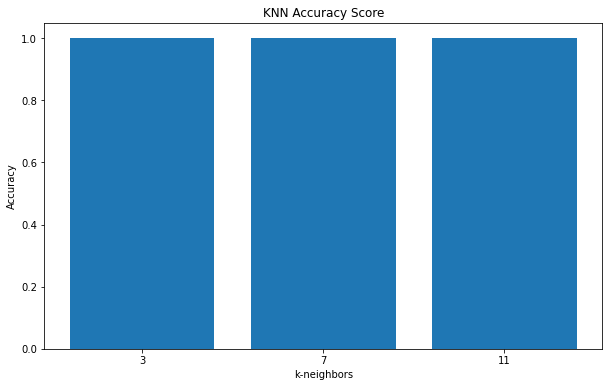

In [216]:
plt.bar(x=['3','7','11'], height=[accuracy_score(y_test, y_pred_1), accuracy_score(y_test, y_pred_2), accuracy_score(y_test, y_pred_3)])
plt.title('KNN Accuracy Score')
plt.ylabel('Accuracy')
plt.xlabel('k-neighbors');

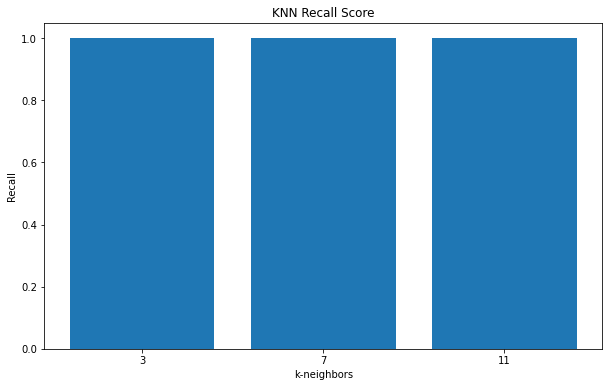

In [80]:
plt.bar(x=['3','7','11'], height=[recall_score(y_test, y_pred_1, average='macro'), recall_score(y_test, y_pred_2, average='macro'), recall_score(y_test, y_pred_3, average='macro')])
plt.title('KNN Recall Score')
plt.ylabel('Recall')
plt.xlabel('k-neighbors');

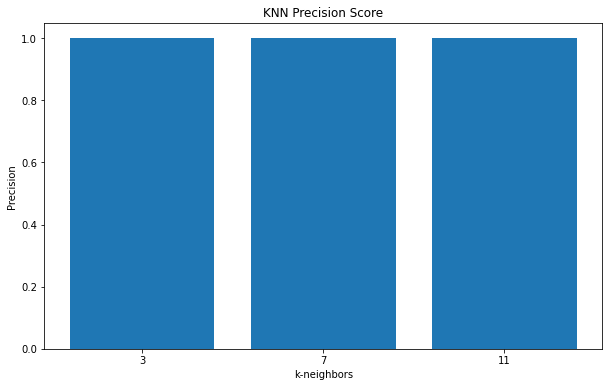

In [81]:
plt.bar(x=['3','7','11'], height=[f1_score(y_test, y_pred_1, average='macro'), f1_score(y_test, y_pred_2, average='macro'), f1_score(y_test, y_pred_3, average='macro')])
plt.title('KNN Precision Score')
plt.ylabel('Precision')
plt.xlabel('k-neighbors');

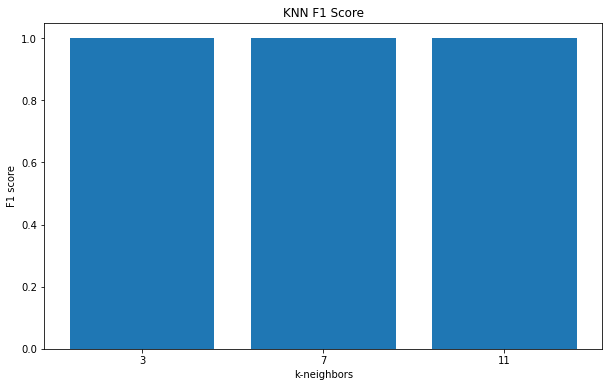

In [82]:
plt.bar(x=['3','7','11'], height=[f1_score(y_test, y_pred_1, average='macro'), f1_score(y_test, y_pred_2, average='macro'), f1_score(y_test, y_pred_3, average='macro')])
plt.title('KNN F1 Score')
plt.ylabel('F1 score')
plt.xlabel('k-neighbors');

In [83]:
KNN_model_min_max = KNN(3)
KNN_model_min_max.fit(x_train_min_max, y_train_min_max)
y_pred_1= KNN_model_min_max.pred(x_test_min_max)

KNN_model_zscore = KNN(3)
KNN_model_zscore.fit(x_train_zscore, y_train_zscore)
y_pred_2= KNN_model_zscore.pred(x_test_zscore)

KNN_model_no_norm = KNN(3)
KNN_model_no_norm.fit(x_train_min_max, y_train_min_max)
y_pred_3 = KNN_model_no_norm.pred(x_test_min_max)

In [84]:
print('accuracy: ', accuracy_score(y_pred_1, y_test_min_max),accuracy_score(y_pred_2, y_test_min_max),accuracy_score(y_pred_3, y_test_min_max))
print('recall: ', recall_score(y_pred_1, y_test_min_max, average='macro'),recall_score(y_pred_2, y_test_min_max, average='macro'),recall_score(y_pred_3, y_test_min_max, average='macro'))
print('precision: ', precision_score(y_pred_1, y_test_min_max, average='macro'),precision_score(y_pred_2, y_test_min_max, average='macro'),precision_score(y_pred_3, y_test_min_max, average='macro'))
print('F1 score: ', f1_score(y_pred_1, y_test_min_max, average='macro'),f1_score(y_pred_2, y_test_min_max, average='macro'),f1_score(y_pred_3, y_test_min_max, average='macro'))

accuracy:  1.0 1.0 1.0
recall:  1.0 1.0 1.0
precision:  1.0 1.0 1.0
F1 score:  1.0 1.0 1.0


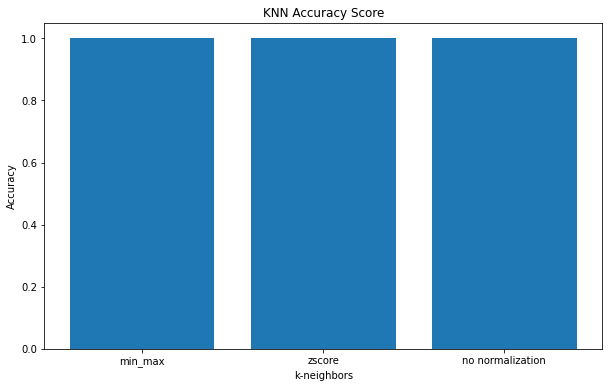

In [85]:
plt.bar(x=['min_max','zscore', 'no normalization'], height=[accuracy_score(y_test, y_pred_1), accuracy_score(y_test, y_pred_2), accuracy_score(y_test, y_pred_3)])
plt.title('KNN Accuracy Score')
plt.ylabel('Accuracy')
plt.xlabel('k-neighbors');

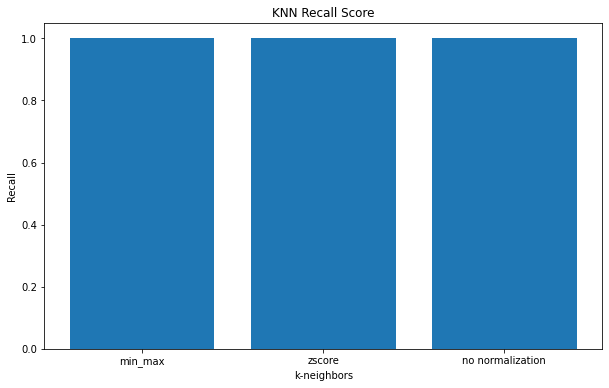

In [86]:
plt.bar(x=['min_max','zscore', 'no normalization'], height=[recall_score(y_test, y_pred_1, average='macro'), recall_score(y_test, y_pred_2, average='macro'), recall_score(y_test, y_pred_3, average='macro')])
plt.title('KNN Recall Score')
plt.ylabel('Recall')
plt.xlabel('k-neighbors');

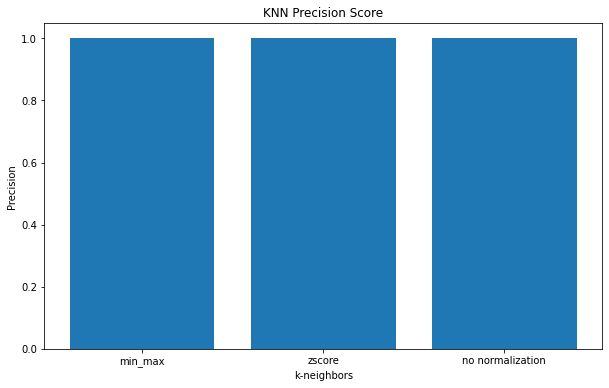

In [87]:
plt.bar(x=['min_max','zscore', 'no normalization'], height=[f1_score(y_test, y_pred_1, average='macro'), f1_score(y_test, y_pred_2, average='macro'), f1_score(y_test, y_pred_3, average='macro')])
plt.title('KNN Precision Score')
plt.ylabel('Precision')
plt.xlabel('k-neighbors');

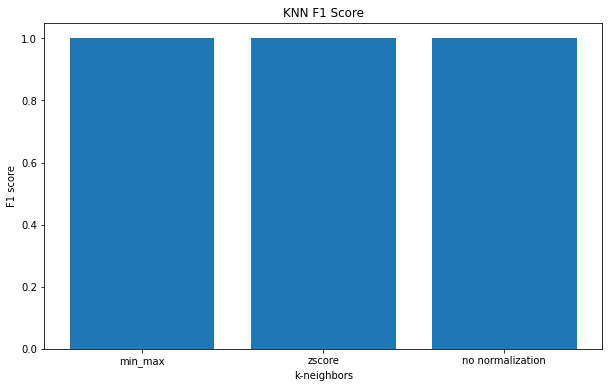

In [88]:
plt.bar(x=['min_max','zscore', 'no normalization'], height=[f1_score(y_test, y_pred_1, average='macro'), f1_score(y_test, y_pred_2, average='macro'), f1_score(y_test, y_pred_3, average='macro')])
plt.title('KNN F1 Score')
plt.ylabel('F1 score')
plt.xlabel('k-neighbors');